#### Data Science Project


#### Question?
+ Predicting whether a hepatitis patient will live or die based on certain attributes or parameters

#### Workflow
+Data Prep
+EDA
+Feature Selection
+Build Model
+ Interpret Model
+ Serialization
+ Production with Streamlit or Flask

In [1]:
#load our EDA PKGS
import pandas as pd
import numpy as np

In [2]:
#load Data VIZ PKGS
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load our datasets
df = pd.read_csv("data/hepatitis.data")

In [4]:
#let's preview the first 5 rows
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


Note- that our dataset is missing column names. how do we fix it?

Attribute Information:

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
-- see the note below
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [9]:
col_names = ["Class",
"AGE",
"SEX",
"STEROID",
"ANTIVIRALS",
"FATIGUE",
"MALAISE",
"ANOREXIA",
"LIVER BIG",
"LIVER FIRM",
"SPLEEN PALPABLE",
"SPIDERS",
"ASCITES",
"VARICES",
"BILIRUBIN",
"ALK PHOSPHATE",
"SGOT",
"ALBUMIN",
"PROTIME",
"HISTOLOGY"]

In [10]:
df = pd.read_csv("data/hepatitis.data",names=col_names)

In [11]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [12]:
# Cleaning col_names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [14]:
# convert to lower case
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [16]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [17]:
#check datatype. search all objects and convert them into numbers
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [18]:
#replace ? with zero
df = df.replace('?', 0)

In [19]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


Note- that all ? have been replace with zero 0

In [21]:
#How many columns with object as data type
sum(df.dtypes == 'object')

15

In [22]:
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [24]:
#covert all objects into numerical data type i.e. Casting
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype (int)

In [25]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

note that everything has been converted to int with exception of bil and alb that are floats(decimal)

In [26]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

In [27]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

#### Narative
+ Most of the data type were in objects
+ Two of them were in float

In [28]:
#counts of each row
df.count()


class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [29]:
df.shape

(155, 20)

In [30]:
#check for missing values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

#### EDA
+ Descriptive analytics

In [31]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [33]:
target_label = {"Die":1, "Live":2}

In [34]:
#check for value count to make sure that we are not working with an imbalance data count
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

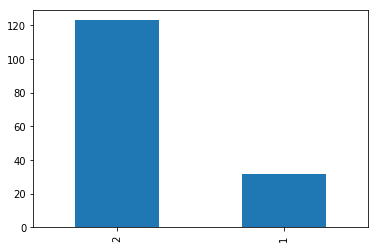

In [37]:
#plot of value_count
df['class'].value_counts().plot(kind='bar')

In [38]:
## check how many are males(1) and females(2)
df['sex'].unique()

array([2, 1], dtype=int64)

In [39]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

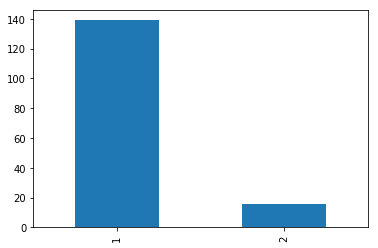

In [40]:
#plot it also
df['sex'].value_counts().plot(kind='bar')

Note that there are more males than females in our datasets

In [41]:
### Age range?
df.groupby(['age', 'sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

#### Determine frequency distribution table using the age range to assess disease population

In [42]:
df['age'].max()

78

In [43]:
df['age'].min()

7

In [44]:
labels = ["Less than 10", "10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()

In [45]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [46]:
freq_df.reset_index(name='count')

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


In [47]:
freq_df = freq_df.reset_index(name='count')

In [48]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


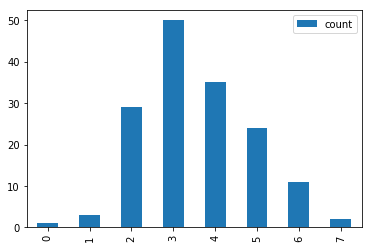

In [49]:
#age groups most affected by the disease?
freq_df.plot(kind='bar')

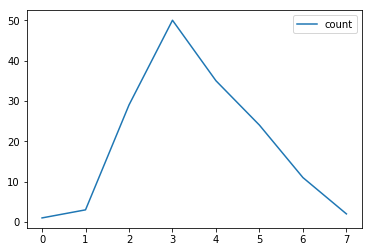

In [50]:
#using a line graph
freq_df.plot(kind='line')

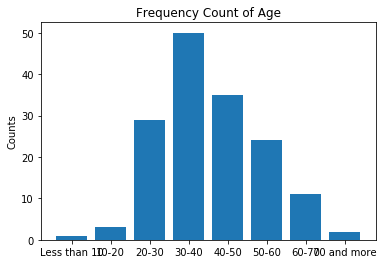

In [51]:
#plot of freq table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

#### Narative Based on the dataset those btw 
+ ages 30-40 have the highest prevalence of the disease follow by 40-50
+ least prevalence are btw ages under 10, and elderly above 70

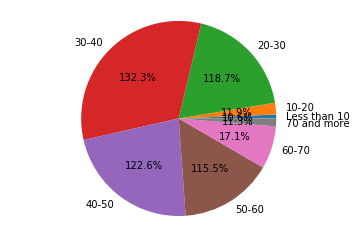

In [78]:
# Pie chart
labels = ["Less than 10", "10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'], labels=labels, autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

#### checking for outliers
+ Univariate analysis
+ Multivariate analysis

#### Methods
+ Boxplot
+ Scatterplot (Multi)
+ Z-score
+ IQR Interquartile Range


In [79]:
# Using boxplot for univar outlier detection
import seaborn as sns

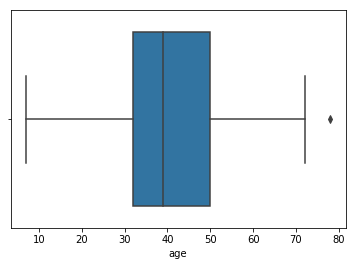

In [80]:
sns.boxplot(df['age'])

Based on the dataset, the outlier is within 78 yrs old range

In [81]:
#check it
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


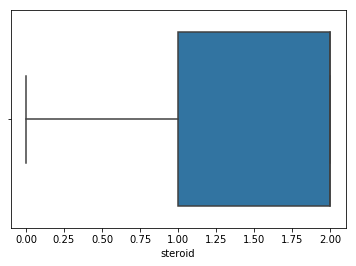

In [82]:
#using boxplot for outlier detection
sns.boxplot(df['steroid'])


there are no outliers detected

In [90]:
#using scatter plot for multiple variables
#sns.scatterplot(df['age'],df['albumin'])

In [89]:
#Scatter plot
#sns.scatterplot(x=df['albumin'], y=df['age'], hue=df['sex'], palette=['green', 'red'], data=df)

#### IQR
+ H-Spread/Mid_spread
+ Measures the stats dispersion/spread
+ IQR = Quantile 3(75)- Quantile 1(25)

In [94]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [95]:
IQR = q3 - q1

In [96]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [100]:
### get actual datapoint that is an outlier
(df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


### Narrative
+ the datapoints with true are outliers

#### solution
+ Remove
+ Change
+ Ignore them

In [103]:
df_no_outlier = df[~((df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [104]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [105]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


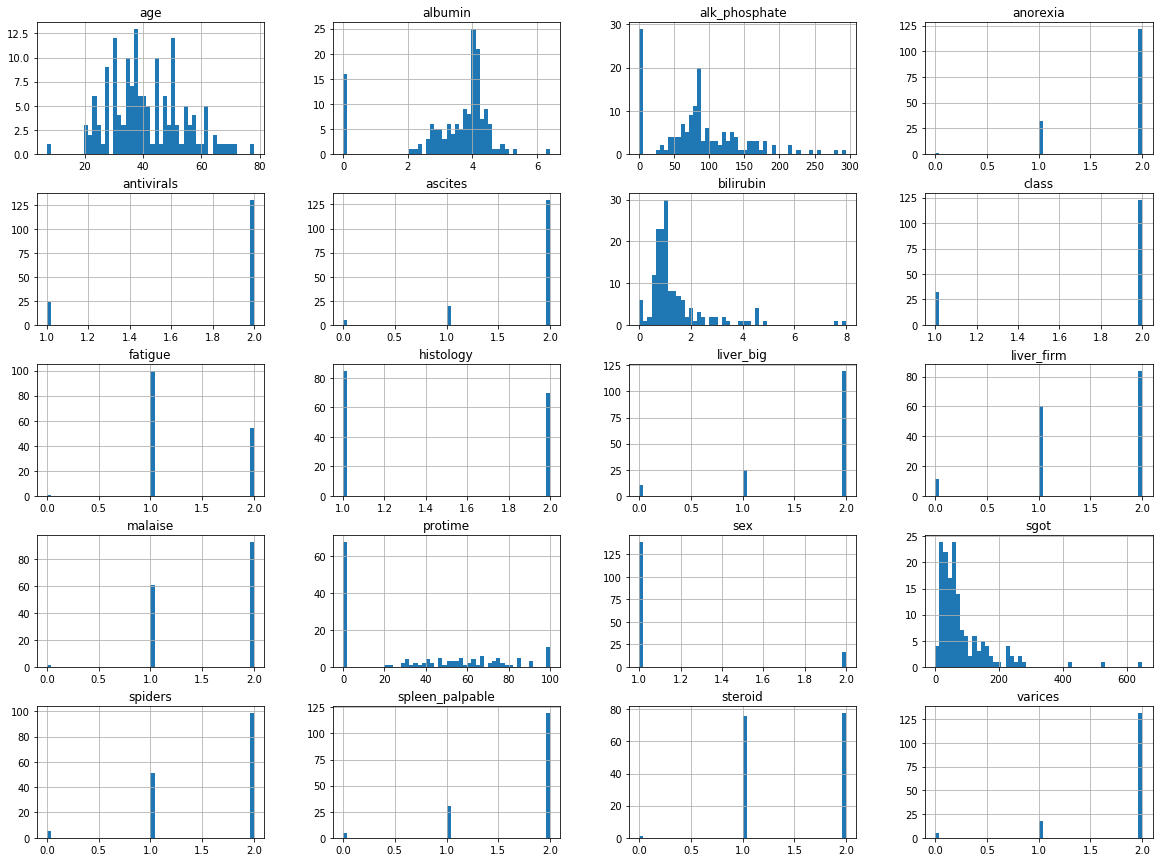

In [106]:
### plot of distribution of data
df.hist(bins=50, figsize=(20, 15))
plt.show()

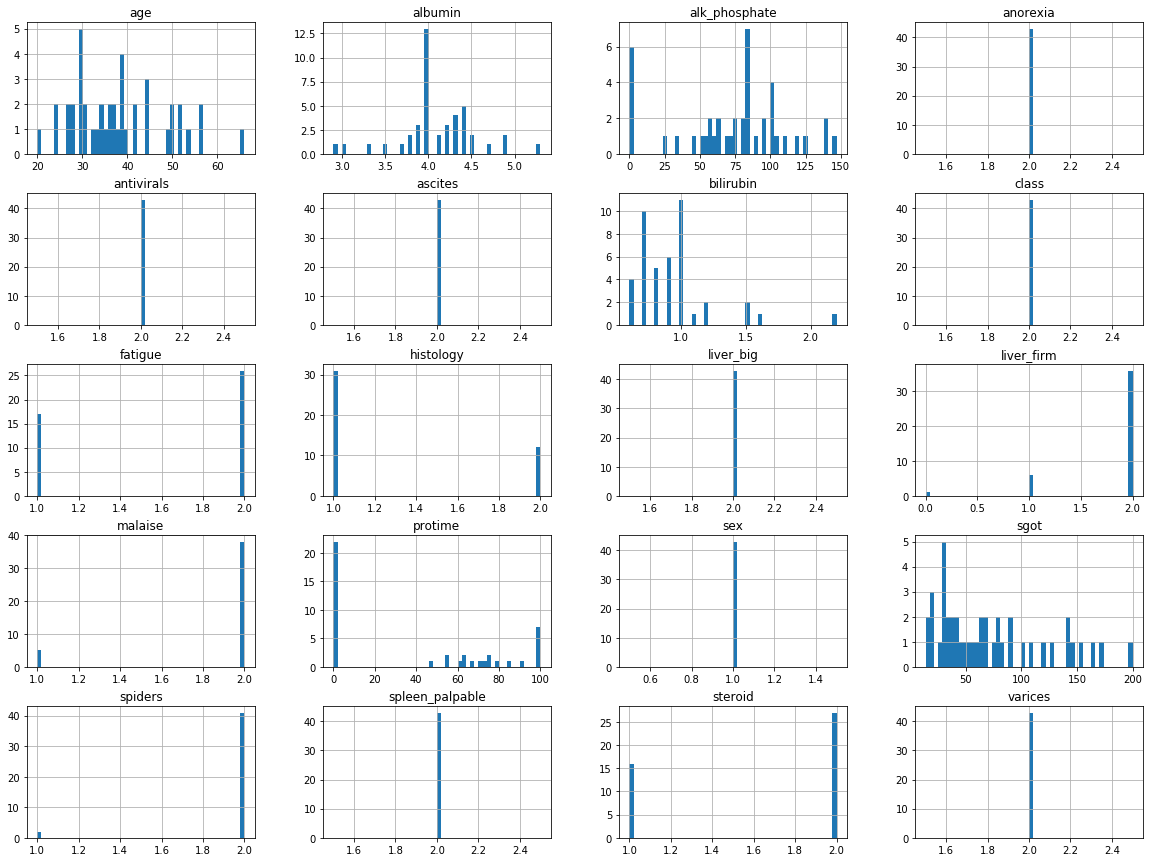

In [107]:
df_no_outlier.hist(bins=50, figsize=(20, 15))
plt.show()

#### Features selection and importance
+ SelectKbest
   - Strong relation with the output/target
+ Recursive Feature Elimination (features that have a strong correleration)

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [109]:
#Features and labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [110]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [111]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [113]:
#using SKbest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures, ylabels)

In [114]:
#check for score. the highest score show the best fit
print("Scores", best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [115]:
# transform(optional)
bf_02 = best_feature_fit.transform(xfeatures)

In [116]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [117]:
#Mapping to the actual feature name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [118]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [122]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['Feature_name'])
best_feature_df = pd.concat([feature_scores, feature_column_names],axis=1)

In [123]:
best_feature_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [125]:
# get the best
# the higher the value the more important the feature is.
#top 10 features that are contributing factors
best_feature_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [159]:
best_feature_df.nlargest(12, 'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

#### Recursive Feature Elimination

In [126]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [127]:
logit = LogisticRegression()

In [130]:
rfe = RFE(logit, 8)

In [132]:
rfe_fit = rfe.fit(xfeatures, ylabels)

In [133]:
#Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['Ranking_Features'])

In [137]:
rfe_feature_df = pd.concat([feature_column_names,selected_features, ranking_features], axis=1)

In [138]:
rfe_feature_df

,Feature_name,Selected_Features,Ranking_Features
0,age,False,9
1,sex,True,1
2,steroid,False,6
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,7
9,spleen_palpable,False,5


anything with true we are going to eliminate it. meaning it's not a contributing factor. i.e lowest ranking and is true

#### Checking for features importance using
+ ExtraTreeClassifier

In [140]:
from sklearn.ensemble import ExtraTreesClassifier

In [141]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [142]:
# print important features
print(et_clf.feature_importances_)

[0.04899443 0.02972233 0.0249056  0.01238088 0.02390739 0.06338473
 0.03700679 0.03934155 0.04262109 0.04859812 0.06019879 0.09442558
 0.07055888 0.08532525 0.06917066 0.05447158 0.07755801 0.05065699
 0.06677135]


In [143]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index= xfeatures.columns)

In [144]:
feature_importance_df

age                0.048994
sex                0.029722
steroid            0.024906
antivirals         0.012381
fatigue            0.023907
malaise            0.063385
anorexia           0.037007
liver_big          0.039342
liver_firm         0.042621
spleen_palpable    0.048598
spiders            0.060199
ascites            0.094426
varices            0.070559
bilirubin          0.085325
alk_phosphate      0.069171
sgot               0.054472
albumin            0.077558
protime            0.050657
histology          0.066771
dtype: float64

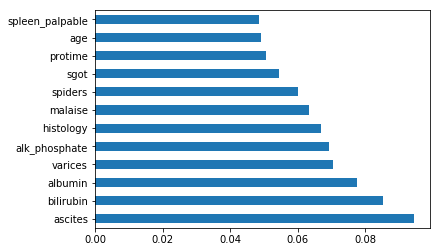

In [146]:
feature_importance_df.nlargest(12).plot(kind='barh')

### Narrative
+ All the methods gave us almost the same features to use

In [147]:
# Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


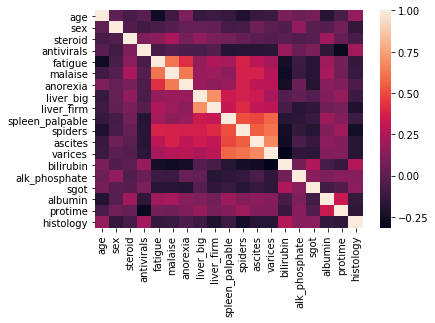

In [148]:
#Plot Heatmap for correlation
sns.heatmap(xfeatures.corr())

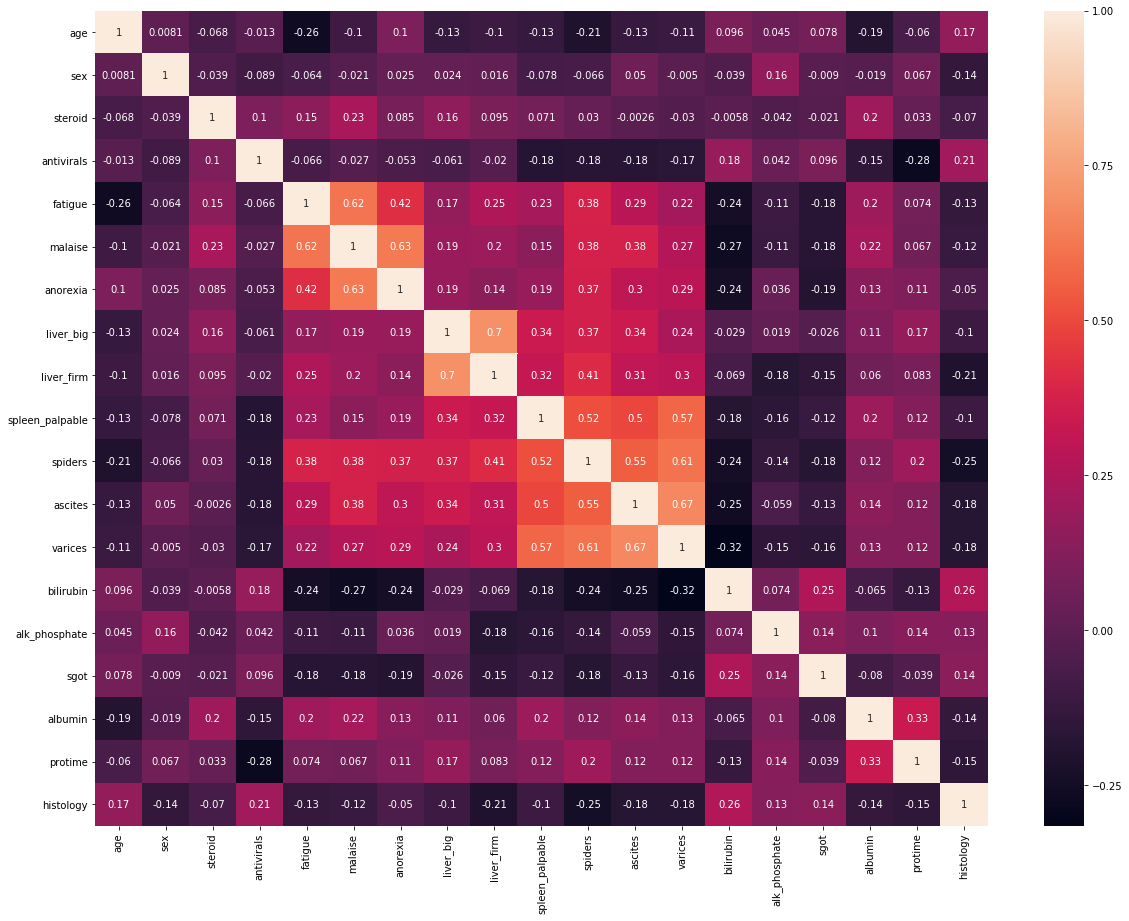

In [151]:
#Heatmap for corr with annot
plt.figure(figsize=(20, 15))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()

### Building our ML Model using
+ Feature & Labels
+ Train/Test/Split
+ LogisticRegression(it's a classifier)
+ RF
+ Decision Tree (DCT)
+ Serialize(To interpret output)

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [154]:
# Features for initial data
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [155]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [156]:
ylabels =df['class']

In [157]:
ylabels

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: class, Length: 155, dtype: int64

In [160]:
# selected features
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [164]:
#features we will be using with our model
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [165]:
# train/test dataset
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.30, random_state=7)

In [166]:
# train/test dataset for the best features
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size=0.30, random_state=7)

In [167]:
# let's now build our model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
# Model Accuracy
#Method 1
logreg.score(x_test, y_test)

0.723404255319149

In [169]:
#Method 2
logreg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [171]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


comparing both x_test and y_test e.g. 2 and 2 pass, 1 and 2 failed

In [172]:
accuracy_score(y_test, logreg.predict(x_test))

0.723404255319149

note that scorea are same as above 0.723

In [173]:
#Building Model
model_logit = LogisticRegression()
model_logit.fit(x_train_b, y_train_b)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
# Model Accuracy
# Method 1
model_logit.score(x_test_b, y_test_b)

0.723404255319149

In [176]:
### Single prediction
x_test.iloc[1]

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [177]:
res_dic = {"Die":1, "Live":2}
x1 = x_test.iloc[1]

In [178]:
#because these are single samples, we have to reshap them.
logreg.predict(np.array(x1).reshape(1, -1))


array([2], dtype=int64)

thus, based on our dataset our model predicted that the person is going to live

In [179]:
### Alternative Algor
clf = DecisionTreeClassifier()


In [180]:
# fit
clf.fit(x_train_b, y_train_b)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [181]:
# model accuracy score
clf.score(x_test_b, y_test_b)

0.7872340425531915

Thus, using a DCT gave a better accuracy score of 0.78 than the logReg 0.72

In [182]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier

In [183]:
knn = KNeighborsClassifier(n_neighbors=3)

In [184]:
# fit
knn.fit(x_train_b, y_train_b)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [185]:
# model accuracy score
knn.score(x_test_b, y_test_b)

0.7446808510638298

#### Save our Model for interpretation(Sterilize) using:
+ Serialization
+ Pickle
+ Joblib
+ numpy/json/ray

In [188]:
# using joblib or pickle
!pip install joblib

In [189]:
import joblib

In [190]:
model_file = open("logistic_regression_hepB_model.pkl","wb")
joblib.dump(model_logit, model_file)
model_file.close()

it has save in the folder 

In [192]:
model_file_knn = open("knn_regression_hepB_model.pkl","wb")
joblib.dump(knn, model_file_knn)
model_file_knn.close()

In [193]:
model_file_clf = open("clf_regression_hepB_model.pkl","wb")
joblib.dump(clf, model_file_clf)
model_file_clf.close()

Note that to open our model use load instead of dump

In [195]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=23678 sha256=10b3ccb3c58267920342ce490205481652c8edb52c01760972538ba2f5edd3a6
  Stored in directory: c:\users\enny_\appdata\local\pip\cache\wheels\1f\5c\ba\f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus


In [225]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [226]:
feature_names_best = xfeatures_best.columns

In [227]:
target_names = ["Die", "Live"]

In [229]:
#create a dot plot
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names_best, class_names=target_names)

In [230]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

In [233]:
#Image(graph.create_png())

In [234]:
# save graph
#graph.write_png("hep_decision_tree_plot.png")

In [198]:
#xfeatures_best.columns

### Interpreting the model & Evaluate the model
+ Eli5
+ Lime
+ SHAP
+ Skater

In [236]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=282987 sha256=fc39510bea1df604896a5587dc3e03664a6edb99cd1687fea2de0382cc756c19
  Stored in directory: c:\users\enny_\appdata\local\pip\cache\wheels\52\f4\97\327dcd53a8b5e3a9d97111dccbdb4f51a7b644af686dac5088
Successfully built lime


In [237]:
# interpreting the model with Lime
import lime
import lime.lime_tabular

In [238]:
# Methods and attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

In [ ]:
# Create lime explainer
+ TabularExplainer = Tables
+ TextExplainer = Text
+ ImageExplainer = Images

In [239]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [240]:
target_names

['Die', 'Live']

In [241]:
class_names = ["Die(1)", "Live(2)"]

In [243]:
#Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values, feature_names=feature_names_best, 
                                                   class_names=class_names, 
                                                   discretize_continuous=True)

In [244]:
x_test_b.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
fatigue            1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          2.0
alk_phosphate    167.0
sgot             242.0
albumin            3.3
protime            0.0
histology          1.0
Name: 76, dtype: float64

In [246]:
model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1, -1))

array([2], dtype=int64)

In [251]:
exp = explainer.explain_instance(x_test_b.iloc[1], model_logit.predict_proba, num_features=14, top_labels=1)

In [252]:
exp.show_in_notebook(show_table=True, show_all=False)

In [253]:
#Alternative using 
exp.as_list()

[('bilirubin > 1.50', -0.4233983674129127),
 ('sex <= 1.00', -0.26774997937759093),
 ('spiders <= 1.00', -0.14928147214100188),
 ('alk_phosphate > 119.25', -0.12477717152438449),
 ('sgot > 90.50', 0.108647460824009),
 ('age > 50.25', -0.07012715717435343),
 ('histology <= 1.00', 0.06698503194804935),
 ('protime <= 0.00', 0.044679663260794804),
 ('2.98 < albumin <= 4.00', 0.04430136099773606),
 ('1.50 < steroid <= 2.00', 0.043199986856007525),
 ('fatigue <= 1.00', 0.028886652753306548),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0)]

In [255]:
!pip install eli5

In [256]:
# Eli5 
import eli5

In [257]:
# show how each feature contributes
eli5.show_weights(model_logit, top =10)

In [260]:
feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']

In [261]:
# show how each feature contributes
eli5.show_weights(model_logit, feature_names=feature_names_best, target_names =class_names, top =10)

In [262]:
# show how each feature contributes
eli5.show_prediction(model_logit,x_test_b.iloc[1], feature_names=feature_names_best, target_names =class_names, top =10)

In [ ]:
### Evaluation of the model
+ Confusion Matrix
+ Classification Report
+ Accuracy core

![](confusionmatrix_image.jpg)

In [271]:
from sklearn.metrics import confusion_matrix

In [272]:
y_pred = model_logit.predict(x_test_b)

In [273]:
# accuracy score
accuracy_score(y_test, y_pred)

0.723404255319149

In [274]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 2, 11],
       [ 2, 32]], dtype=int64)

In [280]:
# Plot
#from sklearn.metrics import plot_confusion_matrix

In [281]:
#plot_confusion_matrix(model_logit, x_test_b, y_test_b)

In [282]:
tp,tf,fn,tn = confusion_matrix(y_test, y_pred).ravel()

In [283]:
tp

2

In [284]:
tf

11

In [285]:
fn

2

In [286]:
tn

32

In [287]:
from sklearn.metrics import classification_report

In [288]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.50      0.15      0.24        13
          2       0.74      0.94      0.83        34

avg / total       0.68      0.72      0.67        47



In [289]:
#alternative use pandas _ml
class_names

['Die(1)', 'Live(2)']

In [290]:
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

     Die(1)       0.50      0.15      0.24        13
    Live(2)       0.74      0.94      0.83        34

avg / total       0.68      0.72      0.67        47



In [292]:
!pip install pandas_ml

In [302]:
#from pandas_ml import ConfusionMatrix
#cm = ConfusionMatrix(y_test, y_pred)
#cm.print_stats()

#cm.plot(normalized=True)
#plt.show()